In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in csv file and convert to dataframe
df = pd.read_csv('nhl_regular_season_team_stats.csv')
df

,TEAM,RECORD,GP,W,L,OTL,PTS,ROW,SOW,SOL,GF,GA,DIFF,HOME,AWAY,L10,STRK,SEASON
0,Washington,C,82,51,22,9,111,49,2,3,288,232,56,26-9-6,25-13-3,4-6-0,L1,2024
1,Toronto,D,82,52,26,4,108,51,1,2,268,231,37,27-13-1,25-13-3,9-1-0,W5,2024
2,Tampa Bay,P,82,47,27,8,102,45,2,3,294,219,75,29-8-4,18-19-4,5-2-3,L1,2024
3,Carolina,P,82,47,30,5,99,47,0,3,266,233,33,31-9-1,16-21-4,3-6-1,L3,2024
4,Florida,P,82,47,31,4,98,41,6,0,252,223,29,27-12-2,20-19-2,3-6-1,L2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,Minnesota,NaN,82,38,36,8,84,33,5,3,231,215,16,23-16-2,15-20-6,5-4-1,L2,2005
608,Phoenix,NaN,82,38,39,5,81,34,4,3,246,271,-25,19-18-4,19-21-1,4-5-1,W1,2005
609,Columbus,NaN,82,35,43,4,74,27,8,3,223,279,-56,23-18-0,12-25-4,6-3-1,W1,2005
610,Chicago,NaN,82,26,43,13,65,24,2,6,211,285,-74,16-19-6,10-24-7,3-5-2,W2,2005


In [3]:
# Find total null values in each column
df.isnull().sum()

TEAM        0
RECORD    284
GP          0
W           0
L           0
OTL         0
PTS         0
ROW         0
SOW         0
SOL         0
GF          0
GA          0
DIFF        0
HOME        0
AWAY        0
L10         0
STRK        0
SEASON      0
dtype: int64

In [4]:
# Find columns that impact Points for each team
correlation = df.corr(numeric_only=True)
print(correlation['PTS'].sort_values(ascending=False))

PTS       1.000000
W         0.985439
ROW       0.946343
GF        0.800776
DIFF      0.780114
GP        0.579222
SOW       0.223966
SOL       0.089536
OTL       0.058925
GA       -0.022443
SEASON   -0.071782
L        -0.457994
Name: PTS, dtype: float64


Text(0.5, 1.0, 'Correlation')

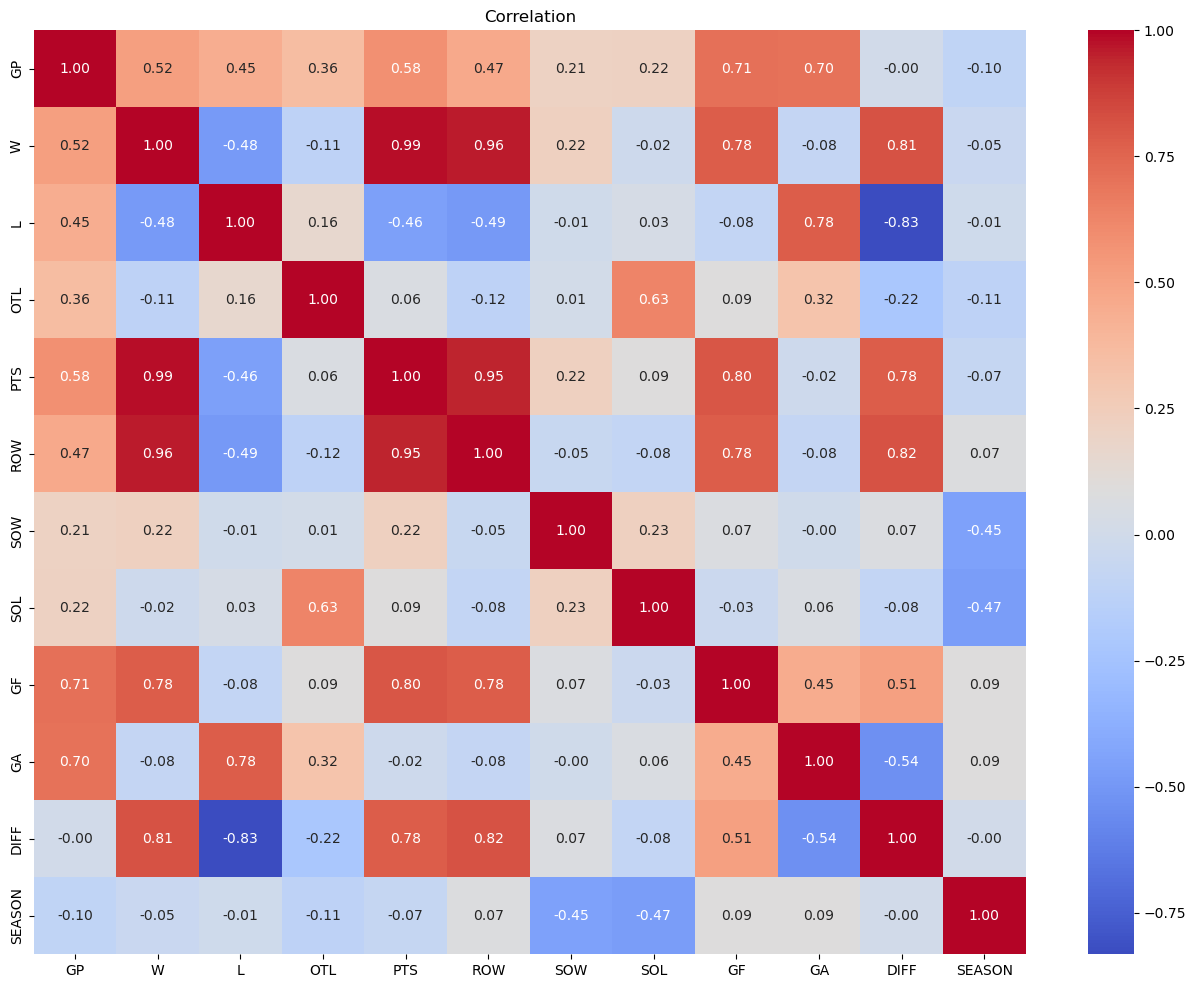

In [5]:
heatmap_columns = df.columns

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

#Create heatmap
plt.figure(figsize=(16,12))
sns.heatmap(heatmap_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

# Futre Scores Prediction Model

In [6]:
df.columns


Index(['TEAM', 'RECORD', 'GP', 'W', 'L', 'OTL', 'PTS', 'ROW', 'SOW', 'SOL',
       'GF', 'GA', 'DIFF', 'HOME', 'AWAY', 'L10', 'STRK', 'SEASON'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Hand pick the features
X = df[['W', 'ROW', 'GF', 'DIFF',]]
y = df["PTS"]

# Train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline: scaling + regression
model = make_pipeline(StandardScaler(), LinearRegression())

# Train
model.fit(Xtrain, ytrain)
print(round(model.score(Xtest, ytest),2))

0.97


In [45]:
import pandas as pd

# Must match the same feature order used during training!
feature_names = ['W', 'ROW', 'GF', 'DIFF']

# Collect inputs
wins = float(input("Enter W: "))
row   = float(input("Enter ROW: "))
gf = float(input("Enter GF: "))
diff   = float(input("Enter DIFF: "))

# Build DataFrame with proper feature names
features_df = pd.DataFrame([{
    'W': wins,
    'ROW': row,
    'GF': gf,
    'DIFF': diff
}])

# Predict
prediction = model.predict(features_df)

print("Predicted Points:", round(prediction[0], 2))


Predicted Points: 13.76
